In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import pickle


# 1

### a)

In [4]:
D = pickle.load(open('PreparacaoLaboratorio3/MNISTsmall.p', 'rb'))
X = D['X'] * 1.0
y = D['trueClass']
f1 = D['foldTrain']
f2 = D['foldTest']

#Dados de Treino
X1 = X[:, f1]
y1 = y[f1]

#Dados de Teste
X2 = X[:, f2]
y2=  y[f2]

#Dados Treino Organizados
idx = (y1 == 3) | (y1 == 8) | (y1 == 9) 
X1 = X1[:, idx]
y1 = y1[idx]

#Dados Teste Organizados
idx = (y2 == 3) | (y2 == 8) | (y2 == 9)
X2 = X2[:, idx]
y2 = y2[idx]

#Confirmação dos Tamanhos e Ordenação
#print(X1.shape, X2.shape)
#plt.plot(y1)
#plt.plot(y2)

#Covariancia
#C3 = np.cov(X1[:, y1 == 3])
#C8 = np.cov(X1[:, y1 == 8])
#C9 = np.cov(X1[:, y1 == 9])

#C = C3 + C8 + C9
C = np.cov(X1)

u, W = la.eig(C)
u = u.real
W = W.real

idx = np.argsort(-u)
u = u[idx]
W = W[:, idx]

un = u / np.sum(u)
L = np.cumsum(un)

print("Número de componentes principais de modo a obter 95% de Variância: ", np.sum(L <= 0.95))

Número de componentes principais de modo a obter 95% de Variância:  139


### b)

In [5]:
#Média dos Dados de Treino
m = np.mean(X1, axis=1)[:, np.newaxis]

Xn = X1-m
W2 = W[:, :3]

Xp = np.dot(W2.T, Xn)
Xr = np.dot(W2, Xp) + m

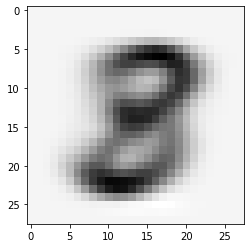

In [6]:
x = Xr[:, 0].reshape(28, 28)
plt.imshow(x, cmap='binary')

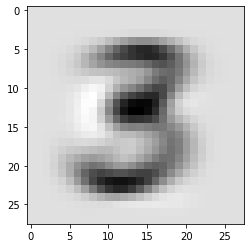

In [7]:
x = Xr[:, 1].reshape(28, 28)
plt.imshow(x, cmap='binary')

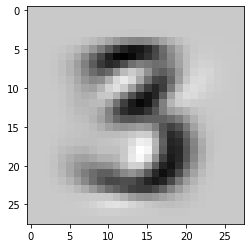

In [8]:
x = Xr[:, 2].reshape(28, 28)
plt.imshow(x, cmap='binary')

### c)

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=150).fit(X1.T)
X2a = pca.transform(X2.T).T

X2ai = pca.inverse_transform(X2a.T).T

print(W.shape)
print(Xp.shape)

#Xr = np.dot(W, Xp)

(784, 784)
(3, 3000)


Text(0.5, 1.0, '8 PCA Inverso')

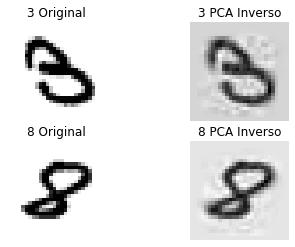

In [12]:
plt.subplot(2, 2, 1)
plt.imshow(X2[:, 0].reshape(28, 28), cmap='binary')
plt.axis('off')
plt.title("3 Original")

plt.subplot(2, 2, 2)
plt.imshow(X2ai[:, 0].reshape(28, 28), cmap='binary')
plt.axis('off')
plt.title("3 PCA Inverso")

plt.subplot(2, 2, 3)
plt.imshow(X2[:, 500].reshape(28, 28), cmap='binary')
plt.axis('off')
plt.title("8 Original")

plt.subplot(2, 2, 4)
plt.imshow(X2ai[:, 500].reshape(28, 28), cmap='binary')
plt.axis('off')
plt.title("8 PCA Inverso")

# 2

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

### a)

In [14]:
X = D['X'] * 1.0
y = D['trueClass']
f1 = D['foldTrain']
f2 = D['foldTest']

#Dados de Treino
X1 = X[:, f1]
y1 = y[f1]

#Dados de Teste
X2 = X[:, f2]
y2 =  y[f2]

#Covariância
Cx =np.cov(X1)
 
u, W = la.eig(Cx)
u = u.real
W = W.real

idx = np.argsort(-u)
u = u[idx]
W = W[:, idx]

un = u / np.sum(u)
L = np.cumsum(un)

print("Número de componentes principais de modo a obter 75% de Variância: ", np.sum(L <= 0.75))

pca = PCA(n_components=32).fit(X1.T)
X1a = pca.transform(X1.T).T
X2a = pca.transform(X2.T).T

Número de componentes principais de modo a obter 75% de Variância:  32


array([[1036.76459791, 1063.33483766,  615.28669602, ..., -154.70752325,
        -258.10053979,  228.66370018],
       [-339.50188057, -405.60906433, -288.85713212, ...,  690.80258298,
         352.90733301,  538.76336662],
       [ 580.48779233,  502.57083092,  762.87455754, ...,  218.93498442,
         148.16258994,  182.52928316],
       ...,
       [-159.18058677, -249.78915524,  -54.34156869, ..., -171.56955154,
          88.04905234, -261.18646791],
       [  56.74647382, -188.89928735,  -28.90634817, ..., -106.5909011 ,
         -56.18429836, -353.04702543],
       [  63.38739675,  214.29605816,   62.74364507, ...,  -63.6153822 ,
           8.15310844,  119.87527576]])

### b)

In [ ]:
svm=SVC(kernel='rbf')

svm=SVC(kernel='rbf').fit(X1a.T, y1)
y2e = svm.predict(X2a.T)

CM = confusion_matrix(y2, y2e)

print(CM)
print("Numero de Erros: ", np.sum(y2 != y2e))

### c)

In [ ]:
#Obter as Dimensões com 75% de Variância
W = W[:, :32]

#Anular a média
m = np.mean(X1, axis = 1)[:, np.newaxis]
X1n = X1 - m
X1p = np.dot(W.T, X1n)

X2n = X2 - m
X2p = np.dot(W.T, X2n)

#Normalizar a Variância
s = np.std(X1p, axis=1)
S = np.diag(1/s)
X1p = np.dot(S, X1p)

s = np.std(X2p, axis=1)
S = np.diag(1/s)
X2p = np.dot(S, X2p)

pca = PCA(n_components=32).fit(X1p.T)
X1a = pca.transform(X1p.T).T
X2a = pca.transform(X2p.T).T

### d)

In [ ]:
svm=SVC(kernel='rbf').fit(X1p.T, y1)
y2e = svm.predict(X2p.T)

CM = confusion_matrix(y2, y2e)

print(CM)
print("Numero de Erros: ", np.sum(y2 != y2e))